In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import networkx as nx

In [2]:
def print_loops(town, loop_file):
    X, Y, C, T, D = read_input(town)
    w, edges = get_loops(loop_file, D) 
    print(w)
    n = D.shape[0]
    G = nx.DiGraph()
    G.add_nodes_from(list(range(n)))
    pos = {i : [X[i], Y[i]] for i in range(n)}
    colors = np.zeros(n)
    colors[C] = 1
    G.add_edges_from(edges)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_size=200, node_color=colors, labels={i : i for i in range(n)}, \
            font_size=16, font_color="green", font_weight="bold", arrow_style="")
    #nx.draw_networkx_edge_labels(G, pos, edge_labels={(1, 10): 'test'})

def get_loops(file, D):
    total = 0
    edges = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for lidx, line in enumerate(lines):
            b = [int(i) for i in  line.strip().split(" ")[1:]]
            if(line[0] == 'b'):
                edges += [(b[i-1], b[i]) for i in range(1, len(b))]
                edges.append((b[-1], b[0]))
                s = sum([D[b[i-1], b[i]] for i in range(1, len(b))])
                s += D[b[-1], b[0]]
                total += s
                if(len(b) > 30):
                    print("Arg !", b[0])
    return total, edges

def read_output(file):
    loops = []
    paths = []
    wnodes = set()
    bnodes = set()
    with open(file, 'r') as f:
        lines = f.readlines()
        for lidx, line in enumerate(lines):
            b = [int(i) for i in  line.strip().split(" ")[1:]]
            if(line[0] == 'b'):
                loops += [(b[i-1], b[i]) for i in range(1, len(b))]
                loops.append((b[-1], b[0]))
                for node in b:
                    if(node in bnodes):
                        print("Fuck : boucle", lidx, node)
                    bnodes.add(node)
            else:
                paths +=  [(b[i-1], b[i]) for i in range(1, len(b))]
                for node in b[1:]:
                    if(node in wnodes):
                        print("Fuck : chemin", lidx, node)
                    wnodes.add(node)
                     
    return loops, paths

def read_input(town):
    t = 'type' if town == 'pim' else 'Type'
    df_nodes = pd.read_csv(f"{town}/nodes.csv", sep=";")
    X = np.array(df_nodes['X'])
    Y = np.array(df_nodes['Y'])
    C = np.where(df_nodes[t] == 'distribution')[0]
    T = np.where(df_nodes[t] != 'distribution')[0]
    D = np.concatenate([[0], np.array(pd.read_csv(f"{town}/distances.csv", sep=";")).reshape(-1)])
    D = D.reshape((X.size, X.size))
    return X, Y, C, T, D

In [3]:
file = "pim"

In [4]:
loops, paths = read_output(file+"/loops.out")

17083


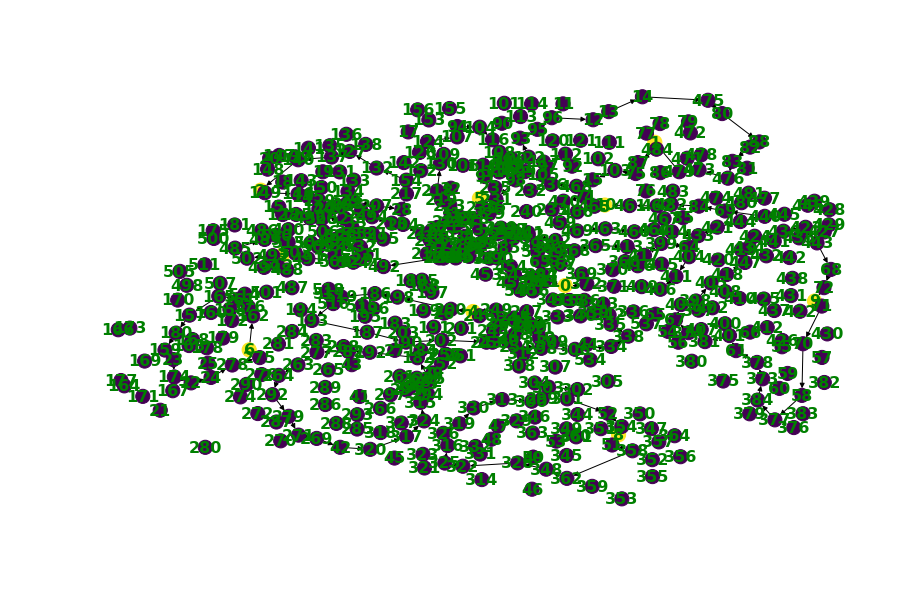

In [5]:
print_loops(file, file+"/loops.out")